In [1]:
from __future__ import division, print_function
from functools import partial, reduce
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fitpack
import interface
import obslib.sidis.reader
import obslib.sidis.stfuncs
from qcdlib.aux import AUX
from tools.config import conf
%matplotlib inline

In [2]:
def get_data():
    # Merge all of the data tables
    return reduce(partial(pd.DataFrame.merge, how="outer"), map(pd.DataFrame, conf["sidis tabs"].values()))

In [3]:
input_file = "../inputs/upol_hermes_mason.py"

CUTMIN = 0.99
CUTMAX = 5.28

filterstr = "dy>"

In [4]:
interface.gen_config(input_file)  # Read file

conf["datasets"]["sidis"]["filters"][0]["filter"] = filterstr + str(CUTMIN)  # Apply filter with min cut

conf["aux"] = AUX()
conf["sidis tabs"] = obslib.sidis.reader.READER().load_data_sets("sidis")
conf['sidis stfuncs'] = obslib.sidis.stfuncs.STFUNCS()

data = get_data().sort_values("dy")

loading sidis data sets 1007

In [5]:
print(", ".join(sorted(data.columns)))

Ebeam, F2, Q2, W2, col, dy, hadron, i, obs, pT, stat_u, systabs_u, systole, systrel, target, value, x, y, yh, yp, z


In [6]:
data["QCUT"] = data["pT"] / data["z"] / data["Q2"] ** 0.5

In [7]:
data_q = data["QCUT"]

colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX

def color_plot(vert_lab, hor_lab, cmap="plasma", alpha=1.0):
    vert = data[vert_lab].values
    hor = data[hor_lab].values

    fig, ax = plt.subplots()

    ax.set_title(vert_lab + " vs. " + hor_lab)
    ax.set_ylabel(vert_lab, rotation="horizontal")
    ax.set_xlabel(hor_lab)

    ax.scatter(hor, vert, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)

    fig.tight_layout()
    
    return fig, ax, vert, hor

In [8]:
data["qT"] = data["pT"] / data["z"]
data["qToverQ"] = data["pT"] / data["z"]/data["Q2"]**0.5

dy vs. qT
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

dy vs. qToverQ
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. qToverQ
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660



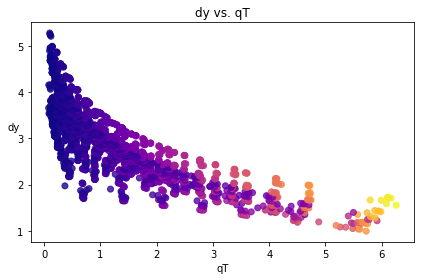

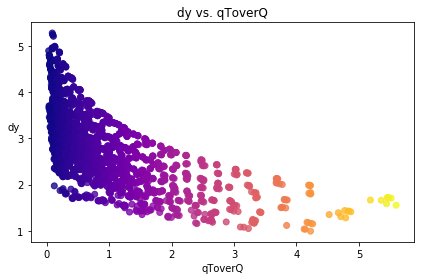

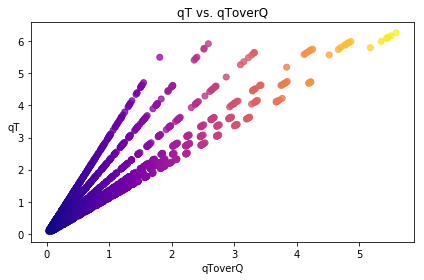

In [9]:
# labels = ("Q2", "pT", "x", "y", "z")
labels = ("dy", "qT","qToverQ")

for v, h in combinations(labels, 2):
    fig, ax, vert, hor = color_plot(v, h, alpha=0.8)

    print(v + " vs. " + h)
    print("Number of points:", len(vert))
    print("Unique vertical values:", len(set(vert)))
    print("Unique horizontal values:", len(set(hor)))
    print()

In [10]:
cut_data = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9")

In [11]:
normal_length = len(cut_data)

len(cut_data.query("pT/z>=0.5*Q2**0.5"))

667

In [12]:
len(cut_data)

978

In [13]:
cut_data_qt = data.query("z<0.6 and Q2>1.69 and pT/z<=0.5*Q2**0.5")

In [14]:
len(cut_data_qt)

513

In [15]:
cut_data1 = data.query("z<0.6 and Q2>1.69 and pT/z<=0.25*Q2**0.5")

In [16]:
len(cut_data1)

228

In [17]:
cut_data1 = data.query("z>0.2 and z<0.6 and Q2>1.69 and pT/z<=0.25*Q2**0.5 and dy<2.25")
len(cut_data1)

1

In [18]:
cut_data1 = data.query("z>0.2 and z<0.6 and Q2>1.69 and pT/z<=0.25*Q2**0.5 and dy>2.")
len(cut_data1)

221

In [19]:
cut_data1 = data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9")
len(cut_data1)

807

In [20]:
cut_data1 = data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy>1.25")
len(cut_data1)

807

In [22]:
cut_data1 = data.query("z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy>3.75")
len(cut_data1)

16